In [6]:
# Fill in here with your code and discussion
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import pairwise_kernels
from qiskit.circuit.library import ZZFeatureMap
from qiskit_aer.primitives import Sampler
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.linear_model import LogisticRegression
from qiskit.circuit.library import PauliFeatureMap
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
import numpy as np
from qiskit.primitives import BackendSampler
from qiskit import Aer
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler

In [7]:
#Cargamos
wine_data = load_wine()
features = wine_data.data


test = wine_data.target



In [8]:


#Dividimos en conjuntos de entrenamiento y test
i_train, i_test, l_train, l_test = train_test_split( features, test, test_size=0.20, random_state=42)

#Cogemos 5 features
i_train = i_train[:,[0,1,2,3,4]]
i_test = i_test[:,[0,1,2,3,4]]

#Normalizamos las features
features_train = MinMaxScaler().fit_transform(i_train)
features_test = MinMaxScaler().fit_transform(i_test)

In [9]:
#Preparamos el kernel

adhoc_feature_map = ZZFeatureMap(feature_dimension=13, reps=2, entanglement="linear")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

In [10]:

#Ejecutamos SVM cuantico

adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)
adhoc_svc.fit(i_train, l_train)
adhoc_score_callable_function = adhoc_svc.score(i_test, l_test)
print(f"Callable kernel classification test score: {adhoc_score_callable_function}")

Callable kernel classification test score: 0.5


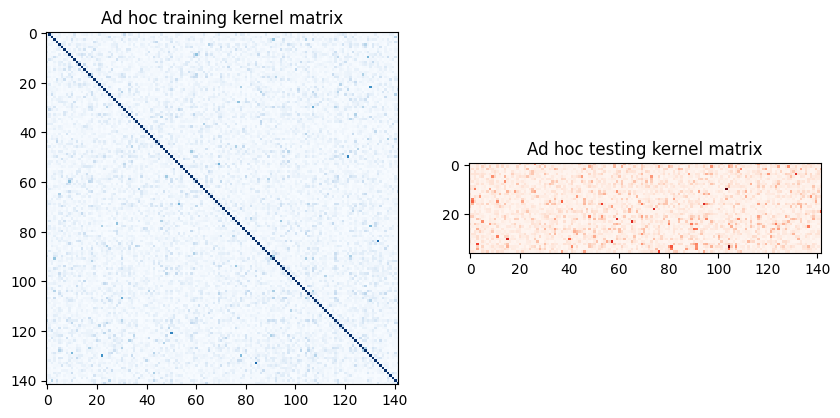

In [11]:
#Graficamos

adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=i_train)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=i_test, y_vec=i_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

In [15]:




matrix = np.round(np.array(adhoc_matrix_train), decimals = 3)

print(matrix)

    
def is_symmetric(matrix):
    return np.array_equal(matrix, matrix.T)
  

def is_positive(matrix):
    if (np.min(matrix) >= 0):
        return True
    else:
        return False
    
    
def diagonal_1(matrix):
    diag = np.diagonal(matrix)
    print(diag)
    if (all(diag) == 1.):
        return True
    else: 
        return False
    

if is_symmetric(matrix):
    print("The matrix is symmetric.")
else:
    print("The matrix is not symmetric.")
    
    
if is_positive(matrix):
     print("The matrix only contains positive values")
else:
    print("The matrix contains some negative values")
    
    
if diagonal_1(matrix):
    print("The matrix has the correct values on its diagonal")
else:
    print("The matrix has not the correct values on its diagonal")

[[1.    0.035 0.036 ... 0.018 0.105 0.019]
 [0.035 1.    0.094 ... 0.066 0.002 0.082]
 [0.036 0.094 1.    ... 0.047 0.288 0.029]
 ...
 [0.018 0.066 0.047 ... 1.    0.03  0.072]
 [0.105 0.002 0.288 ... 0.03  1.    0.072]
 [0.019 0.082 0.029 ... 0.072 0.072 1.   ]]
The matrix is symmetric.
The matrix only contains positive values
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The matrix has the correct values on its diagonal
